In [2]:
using DataCubeReader
using Images
using ImageMagick
using Gadfly

#### Open a datacube and obtain a handle to its data

In [3]:
cubepath="/Users/fgans/scratch/my-cablab-cube/"
c=Cube(cubepath)
cdata=CubeData(c)
cdata.dataset_files

3-element Array{UTF8String,1}:
 "BurntArea"
 "Emission" 
 "Precip"   

#### Read a full map at a single time step

In [4]:
x=getCube(cdata,"Precip",(DateTime(2003,1,1),DateTime(2003,1,1)),(-90,90),(-180,180));

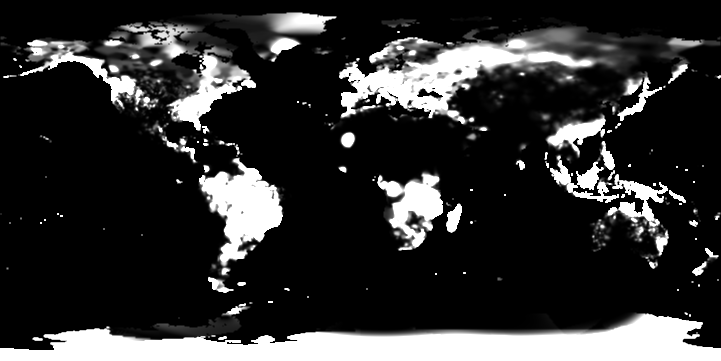

In [5]:
x[x.<0]=0
grayim(x[:,:,1])

#### Read the full time series in a specific area only

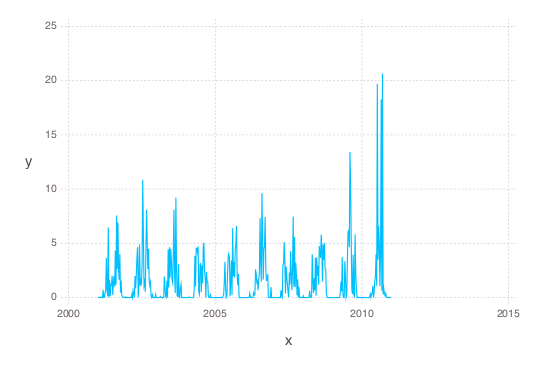

In [6]:
precip_specific_area = getCube(cdata, variable="Precip", latitude=(0,10), longitude=(10,20));
precip_specific_area[precip_specific_area.<0]=0
plot(x=getTimeRanges(cdata),y=precip_specific_area[3,3,:][:],Geom.line)

#### Read another variable

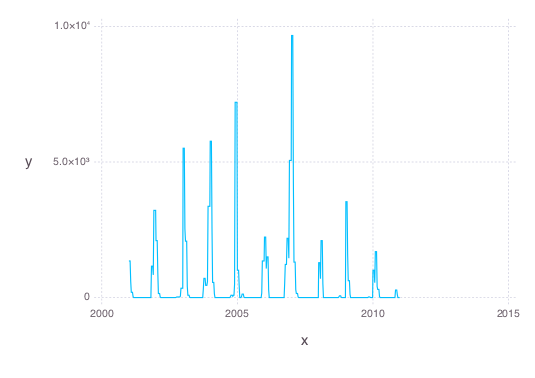

In [7]:
emission_specific_area = getCube(cdata, variable="BurntArea", latitude=(0,10), longitude=(10,20));
emission_specific_area[emission_specific_area.<0]=0
plot(x=getTimeRanges(cdata),y=emission_specific_area[3,3,:][:],Geom.line)